In [2]:
from preprocessing_functions import *
from models_functions import *
from experiments_functions import *

# 3) Finding the best predictor set

## Remove unnecessary features from baseline predictor set

In [ ]:
# test wether the firsts feature set is correlated
indicators_dict = calculate_indicators(indicators = ["rx90p", "pr"])
indicators_dict = indicators_calculate_extra_features(indicators_dict)

aggregated_indicators = aggregate_by_pixel(indicators_dict, 3, 75)
df = dict_to_dataframe(aggregated_indicators)
df_merged = df_add_index_variables(df, lags=6, trend = True, mean = True)

df_scaled = encode_and_scale(df_merged)
corr_plot(df_scaled, "Initial predictor set pearson correlation matrix", outpath="InitialSet_Pearson_corr", target_vars=["rx90p_anom", "pr_anom"])
corr_plot(df_scaled, "Initial predictor set spearman correlation matrix", outpath="InitialSet_Spearman_corr", correlation = "spearman", target_vars=["rx90p_anom", "pr_anom"])

In [ ]:
X_train, y_train, X_val, y_val = train_test_split(df_scaled, include_years=False)

models = build_and_train_models(X_train, y_train, models = {"Lasso": MultiTaskLassoCV(cv = 20, random_state = 123)}, experiment_name = "InitialSet")

# Fit the model
evaluate_models(X_val, y_val, models, store_testing=True, out_path = "/home/vgarcia/experiments/FeatureSelection", experiment_name="InitialSet")

---Training (MSE, MSSS, MAE, R2)---
Lasso: [0.26084881 0.2088531 ], [0.11915716 0.14387449], [0.325676   0.31460534], [0.09952616 0.12753314]
All models trained
---Testing (MSE, MSSS, MAE, R2)---
Climatology: [0.30296596 0.21730943], [0. 0.], [0.35794015 0.32449689], [-0.09484324 -0.04971614]
InitialSet_Lasso: [0.27047575 0.19504869], [0.10724045 0.10243801], [0.34667371 0.31385224], [0.02256824 0.05781469]


### Baseline

In [ ]:
experiment_name = "baseline_"

indicators_dict = calculate_indicators(indicators = ["rx90p", "pr", "ssr", "hurs", "txx", "tnn", "tas", "g500"])
indicators_dict = indicators_calculate_extra_features(indicators_dict)
aggregated_indicators = aggregate_by_pixel(indicators_dict, 3, 75)
df = dict_to_dataframe(aggregated_indicators)
df_merged = df_add_index_variables(df, mean = False, trend=False, lags = [4])

df_scaled = encode_and_scale(df_merged)
X_train, y_train, X_val, y_val = train_test_split(df_scaled, include_years=False)

models = build_and_train_models(X_train, y_train, models = {"Lasso": MultiTaskLassoCV(cv = 20, random_state = 123),
                                                            "RF" : RandomForestRegressor(n_estimators=100, random_state=123)}, experiment_name = experiment_name)
evaluate_models(X_val, y_val, models, store_testing=True, out_path = "/home/vgarcia/experiments/FeatureSelection/", experiment_name=experiment_name)

lasso_plot(models[f"{experiment_name}_Lasso"], X_val.columns, out_path = f"/home/vgarcia/experiments/FeatureSelection/{experiment_name}")
RF_plot(models[f"{experiment_name}_RF"], X_val.columns, out_path = "/home/vgarcia/experiments/FeatureSelection/{experiment_name}")

calculating montly mean for pr
Plot saved to InitialSet_Pearson_corr


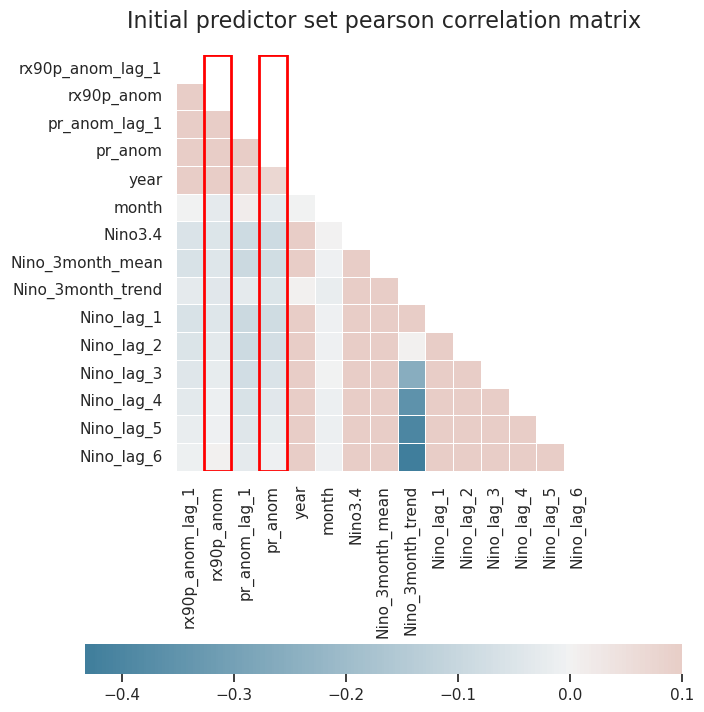

Plot saved to InitialSet_Spearman_corr


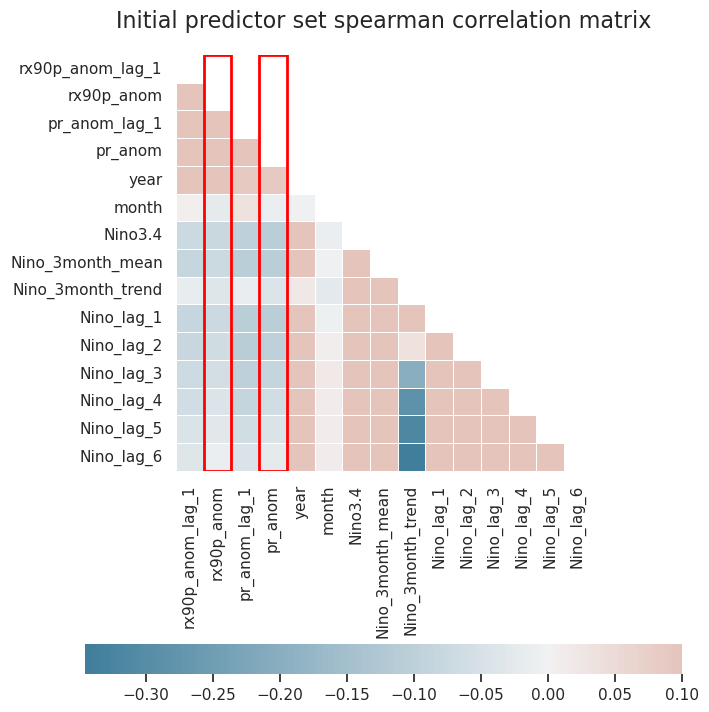

In [16]:
# test wether the firsts feature set is correlated
indicators_dict = calculate_indicators(indicators = ["rx90p", "pr"])
indicators_dict = indicators_calculate_extra_features(indicators_dict)

aggregated_indicators = aggregate_by_pixel(indicators_dict, 3, 75)
df = dict_to_dataframe(aggregated_indicators)
df_merged = df_add_index_variables(df, lags=6, trend = True, mean = True)

df_scaled = encode_and_scale(df_merged)
corr_plot(df_scaled, "Initial predictor set pearson correlation matrix", outpath="InitialSet_Pearson_corr", target_vars=["rx90p_anom", "pr_anom"])
corr_plot(df_scaled, "Initial predictor set spearman correlation matrix", outpath="InitialSet_Spearman_corr", correlation = "spearman", target_vars=["rx90p_anom", "pr_anom"])

In [17]:
X_train, y_train, X_val, y_val = train_test_split(df_scaled, include_years=False)

models = build_and_train_models(X_train, y_train, models = {"Lasso": MultiTaskLassoCV(cv = 20, random_state = 123)}, experiment_name = "InitialSet")

# Fit the model
evaluate_models(X_val, y_val, models, store_testing=True, out_path = "/home/vgarcia/experiments/FeatureSelection", experiment_name="InitialSet")

---Training (MSE, MSSS, MAE, R2)---
Lasso: [0.26084881 0.2088531 ], [0.11915716 0.14387449], [0.325676   0.31460534], [0.09952616 0.12753314]
All models trained
---Testing (MSE, MSSS, MAE, R2)---
Climatology: [0.30296596 0.21730943], [0. 0.], [0.35794015 0.32449689], [-0.09484324 -0.04971614]
InitialSet_Lasso: [0.27047575 0.19504869], [0.10724045 0.10243801], [0.34667371 0.31385224], [0.02256824 0.05781469]


## Define new baseline model

calculating montly mean for pr
---Training (MSE, MSSS, MAE, R2)---
RF: [0.02372442 0.01545336], [0.92036859 0.93721903], [0.08622939 0.07184068], [0.9186502  0.93601133]
All models trained
---Testing (MSE, MSSS, MAE, R2)---
Climatology: [0.30289469 0.21742011], [0. 0.], [0.35795095 0.32460367], [-0.09458571 -0.05025077]
baseline_RF: [0.29055465 0.22260775], [ 0.04074037 -0.02386   ], [0.36543561 0.33980859], [-0.04999188 -0.07530976]


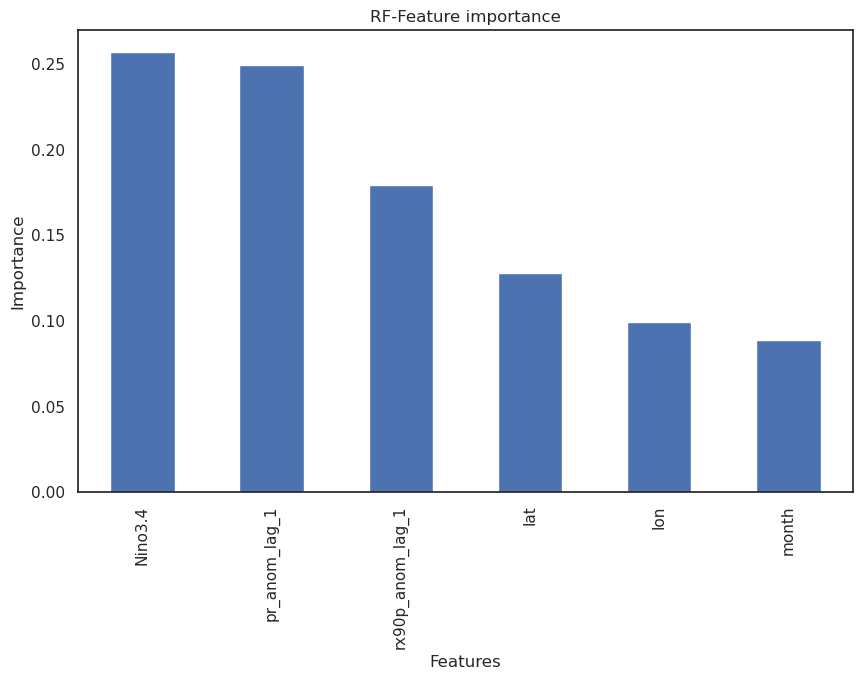

In [ ]:
experiment_name = "baseline"

indicators_dict = calculate_indicators(indicators = ["rx90p", "pr"])
indicators_dict = indicators_calculate_extra_features(indicators_dict)
aggregated_indicators = aggregate_by_pixel(indicators_dict, 3, 75)
df = dict_to_dataframe(aggregated_indicators)
df_merged = df_add_index_variables(df, mean = False, trend=False, lags = 0)

df_scaled = encode_and_scale(df_merged)
X_train, y_train, X_val, y_val = train_test_split(df_scaled, include_years=False)

models = build_and_train_models(X_train, y_train, models = {"Lasso": MultiTaskLasso(random_state = 123),
                                                            "RF" : RandomForestRegressor(n_estimators=100, random_state=123)}, experiment_name = experiment_name)
evaluate_models(X_val, y_val, models, store_testing=True, out_path = f"/home/vgarcia/experiments/FeatureSelection/", experiment_name=experiment_name)

lasso_plot(models[f"{experiment_name}_Lasso"], X_val.columns, out_path = f"/home/vgarcia/experiments/FeatureSelection/{experiment_name}")
RF_plot(models[f"{experiment_name}_RF"], X_val.columns, out_path = f"/home/vgarcia/experiments/FeatureSelection/{experiment_name}")

## Add all indicators

In [ ]:
experiment_name = "AllIndicators"

indicators_dict = calculate_indicators(indicators = ["rx90p", "pr", "ssr", "hurs", "txx", "tnn", "tas", "g500"])
indicators_dict = indicators_calculate_extra_features(indicators_dict)
aggregated_indicators = aggregate_by_pixel(indicators_dict, 3, 75)
df = dict_to_dataframe(aggregated_indicators)
df_merged = df_add_index_variables(df, mean = False, trend=False, lags = [4])

df_scaled = encode_and_scale(df_merged)
X_train, y_train, X_val, y_val = train_test_split(df_scaled, include_years=False)

models = build_and_train_models(X_train, y_train, models = {"Lasso": MultiTaskLasso(random_state = 123),
                                                            "RF" : RandomForestRegressor(n_estimators=100, random_state=123)}, experiment_name = experiment_name)
evaluate_models(X_val, y_val, models, store_testing=True, out_path = f"/home/vgarcia/experiments/FeatureSelection/", experiment_name=experiment_name)

lasso_plot(models[f"{experiment_name}_Lasso"], X_val.columns, out_path = f"/home/vgarcia/experiments/FeatureSelection/{experiment_name}")
RF_plot(models[f"{experiment_name}_RF"], X_val.columns, out_path = f"/home/vgarcia/experiments/FeatureSelection/{experiment_name}")

## Best ideal model

### With the best indicator set

calculating montly mean for pr
calculating montly mean for ssr
calculating montly mean for hurs
---Training (MSE, MSSS, MAE, R2)---
Lasso: [0.20788241 0.13692882], [0.31070938 0.44668956], [0.27558817 0.23388588], [0.29855773 0.44030011]
RF: [0.02171069 0.01309954], [0.9280123  0.94706656], [0.0861158  0.06773617], [0.92674321 0.9464553 ]
All models trained
---Testing (MSE, MSSS, MAE, R2)---
Climatology: [0.3003145  0.21601724], [0. 0.], [0.35117145 0.31995683], [-0.08760729 -0.04568383]
IdealFullSet_Lasso: [0.21665241 0.13061691], [0.27858158 0.39534034], [0.29315923 0.2385583 ], [0.21538007 0.36771718]
IdealFullSet_RF: [0.19578203 0.11315711], [0.34807666 0.47616627], [0.28312146 0.22148739], [0.29096343 0.45223554]


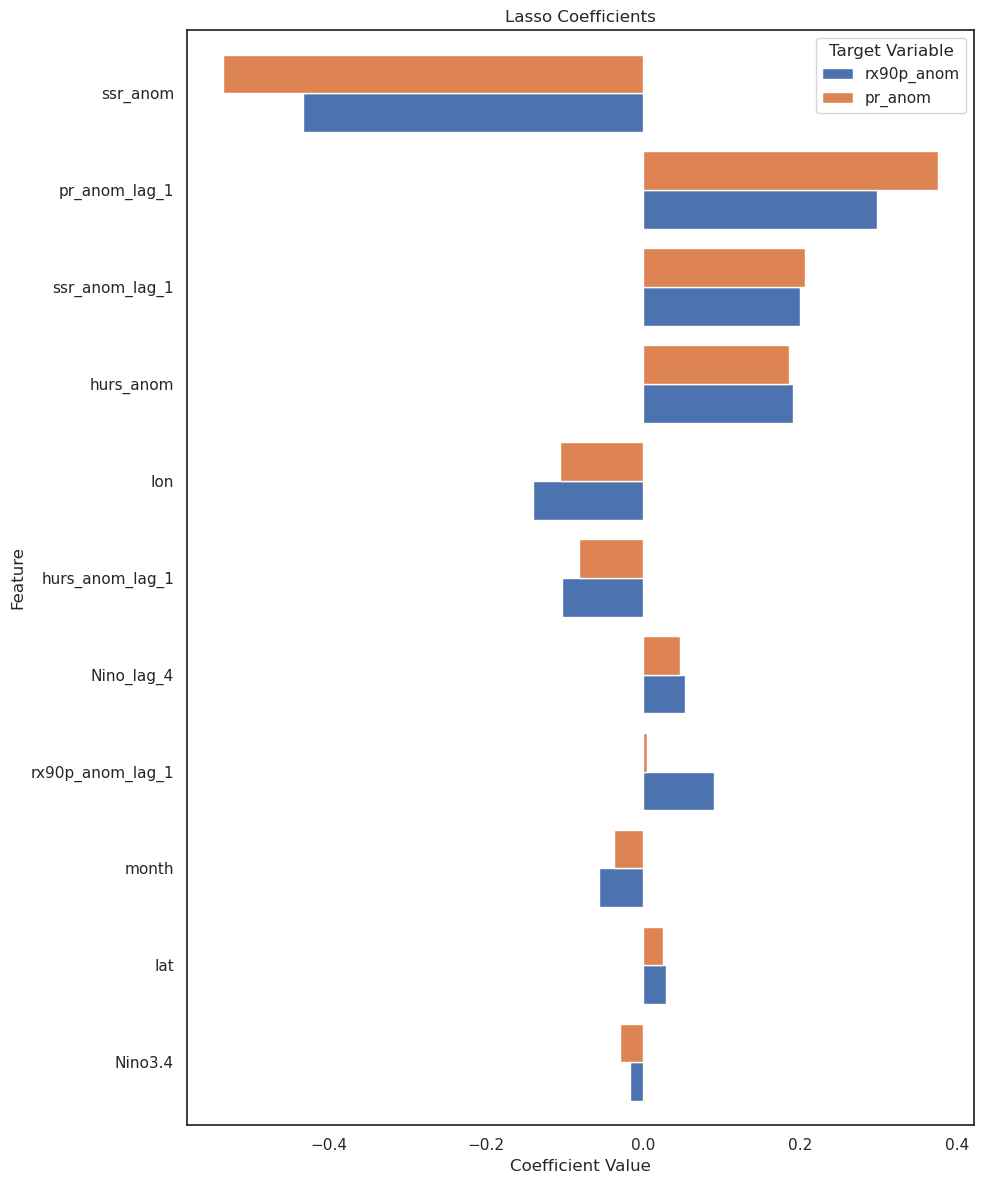

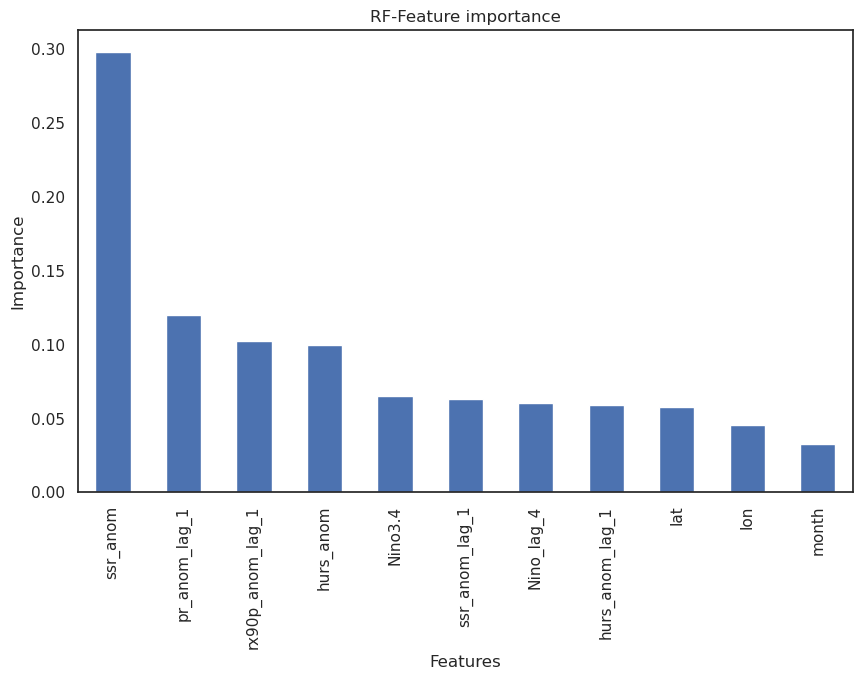

In [ ]:
experiment_name = "IdealFullSet"

indicators_dict = calculate_indicators(indicators = ["rx90p", "pr", "ssr", "hurs"])
indicators_dict = indicators_calculate_extra_features(indicators_dict)
aggregated_indicators = aggregate_by_pixel(indicators_dict, 3, 75)
df = dict_to_dataframe(aggregated_indicators)
df_merged = df_add_index_variables(df, mean = False, trend=False, lags = 0)

df_scaled = encode_and_scale(df_merged)
X_train, y_train, X_val, y_val = train_test_split(df_scaled, include_years=False)

models = build_and_train_models(X_train, y_train, models = {"Lasso": MultiTaskLasso(random_state = 123),
                                                            "RF" : RandomForestRegressor(n_estimators=100, random_state=123)}, experiment_name = experiment_name)
evaluate_models(X_val, y_val, models, store_testing=True, out_path = "/home/vgarcia/experiments/FeatureSelection/", experiment_name=experiment_name)

lasso_plot(models[f"{experiment_name}_Lasso"], X_val.columns, out_path = f"/home/vgarcia/experiments/FeatureSelection/{experiment_name}")
RF_plot(models[f"{experiment_name}_RF"], X_val.columns, out_path = "/home/vgarcia/experiments/FeatureSelection/{experiment_name}")

### Ideal T set

calculating montly mean for pr
calculating montly mean for tas
---Training (MSE, MSSS, MAE, R2)---
Lasso: [0.22752932 0.16461498], [0.23264617 0.32913145], [0.29339484 0.26657556], [0.21671644 0.31726542]
RF: [0.02539614 0.01694111], [0.91435027 0.93095852], [0.09279673 0.07866164], [0.91257224 0.92973735]
All models trained
---Testing (MSE, MSSS, MAE, R2)---
Climatology: [0.3012354 0.2161692], [0. 0.], [0.35804642 0.32430136], [-0.09344899 -0.04426982]
IdealTempSet_Lasso: [0.24381395 0.1613185 ], [0.19061986 0.2537397 ], [0.31778446 0.27267598], [0.1149841  0.22070289]
IdealTempSet_RF: [0.24733057 0.16396788], [0.17894584 0.24148361], [0.32250505 0.27355384], [0.10221916 0.20790423]


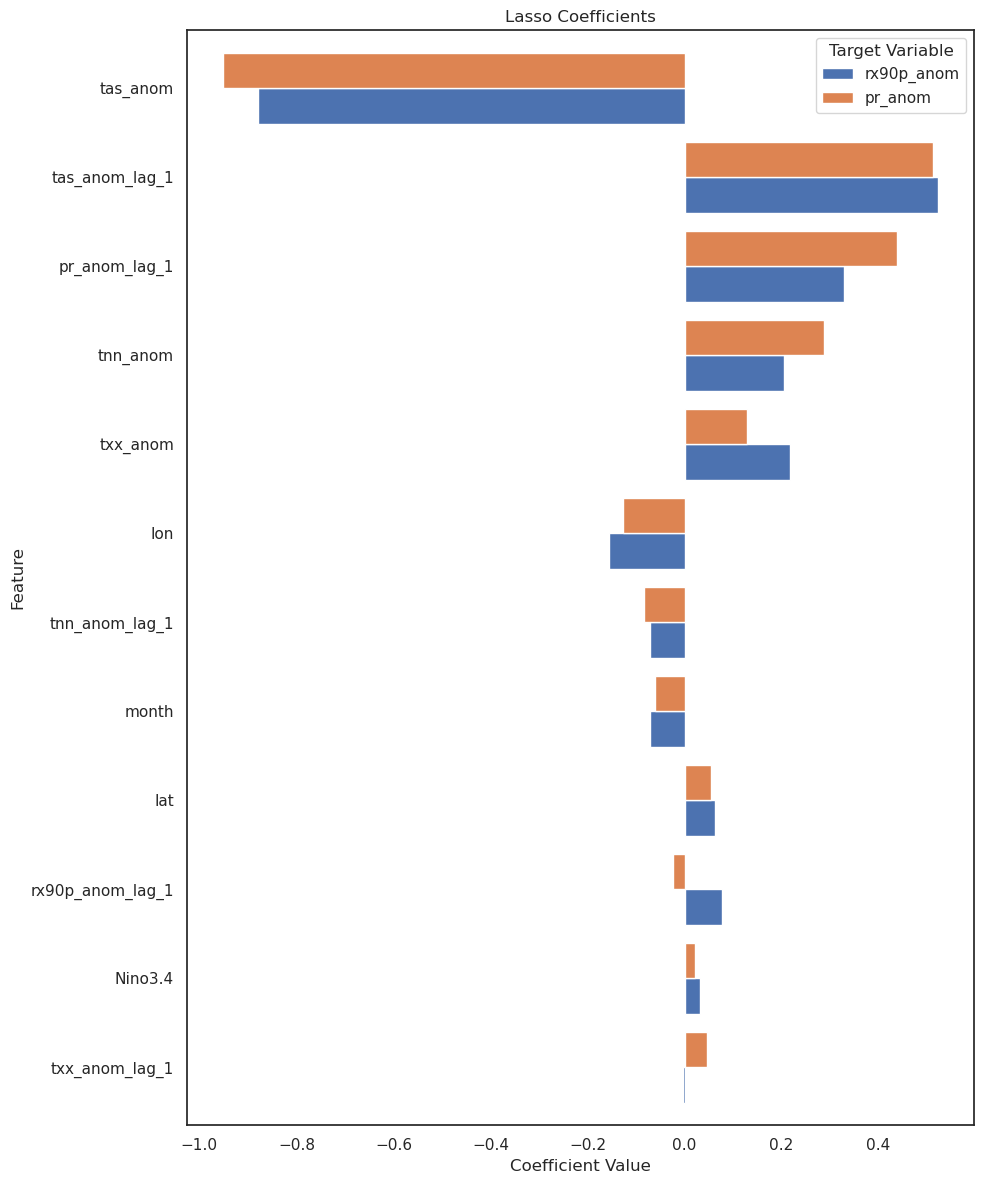

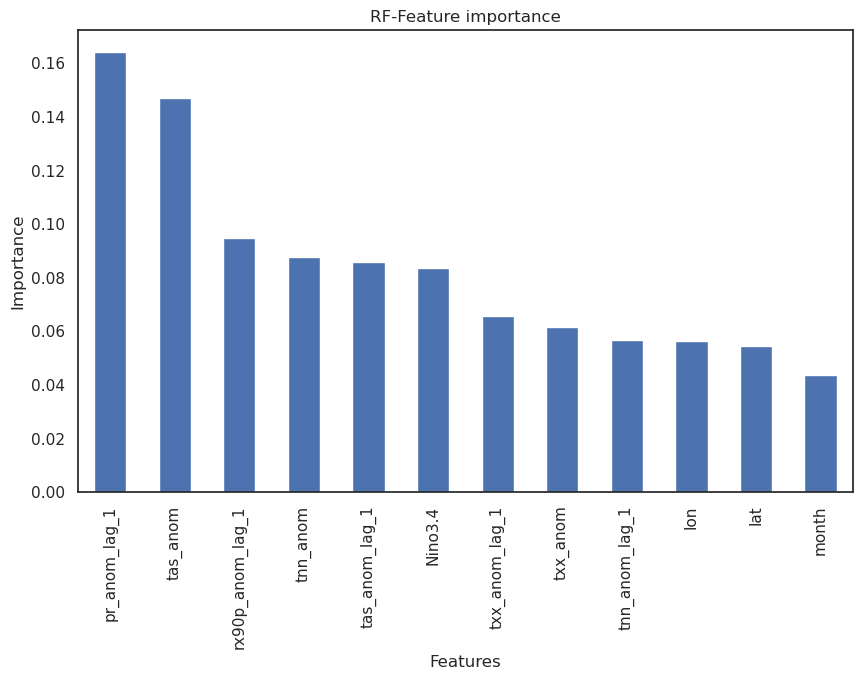

In [ ]:
experiment_name = "IdealTempSet"

indicators_dict = calculate_indicators(indicators = ["rx90p", "pr", "txx", "tas", "tnn"])
indicators_dict = indicators_calculate_extra_features(indicators_dict)
aggregated_indicators = aggregate_by_pixel(indicators_dict, 3, 75)
df = dict_to_dataframe(aggregated_indicators)
df_merged = df_add_index_variables(df, mean = False, trend=False, lags = 0)

df_scaled = encode_and_scale(df_merged)
X_train, y_train, X_val, y_val = train_test_split(df_scaled, include_years=False)

models = build_and_train_models(X_train, y_train, models = {"Lasso": MultiTaskLasso(random_state = 123),
                                                            "RF" : RandomForestRegressor(n_estimators=100, random_state=123)}, experiment_name = experiment_name)
evaluate_models(X_val, y_val, models, store_testing=True, out_path = "/home/vgarcia/experiments/FeatureSelection/", experiment_name=experiment_name)

lasso_plot(models[f"{experiment_name}_Lasso"], X_val.columns, out_path = f"/home/vgarcia/experiments/FeatureSelection/{experiment_name}")
RF_plot(models[f"{experiment_name}_RF"], X_val.columns, out_path = f"/home/vgarcia/experiments/FeatureSelection/{experiment_name}")

### Ideal Txx set

calculating montly mean for pr
calculating montly mean for tas
---Training (MSE, MSSS, MAE, R2)---
Lasso: [0.2349875  0.17564584], [0.21126063 0.28641933], [0.30076294 0.27894639], [0.19424014 0.27269239]
RF: [0.02462817 0.01637056], [0.91733516 0.93349278], [0.09066241 0.07634591], [0.9155513  0.93221341]
All models trained
---Testing (MSE, MSSS, MAE, R2)---
Climatology: [0.30289469 0.21742011], [0. 0.], [0.35795095 0.32460367], [-0.09458571 -0.05025077]
IdealTxx_Lasso: [0.25250316 0.17413605], [0.16636652 0.19908028], [0.32712219 0.28671038], [0.08751671 0.15883345]
IdealTxx_RF: [0.25840706 0.17688057], [0.14687493 0.18645719], [0.330881   0.28557723], [0.06618149 0.14557603]


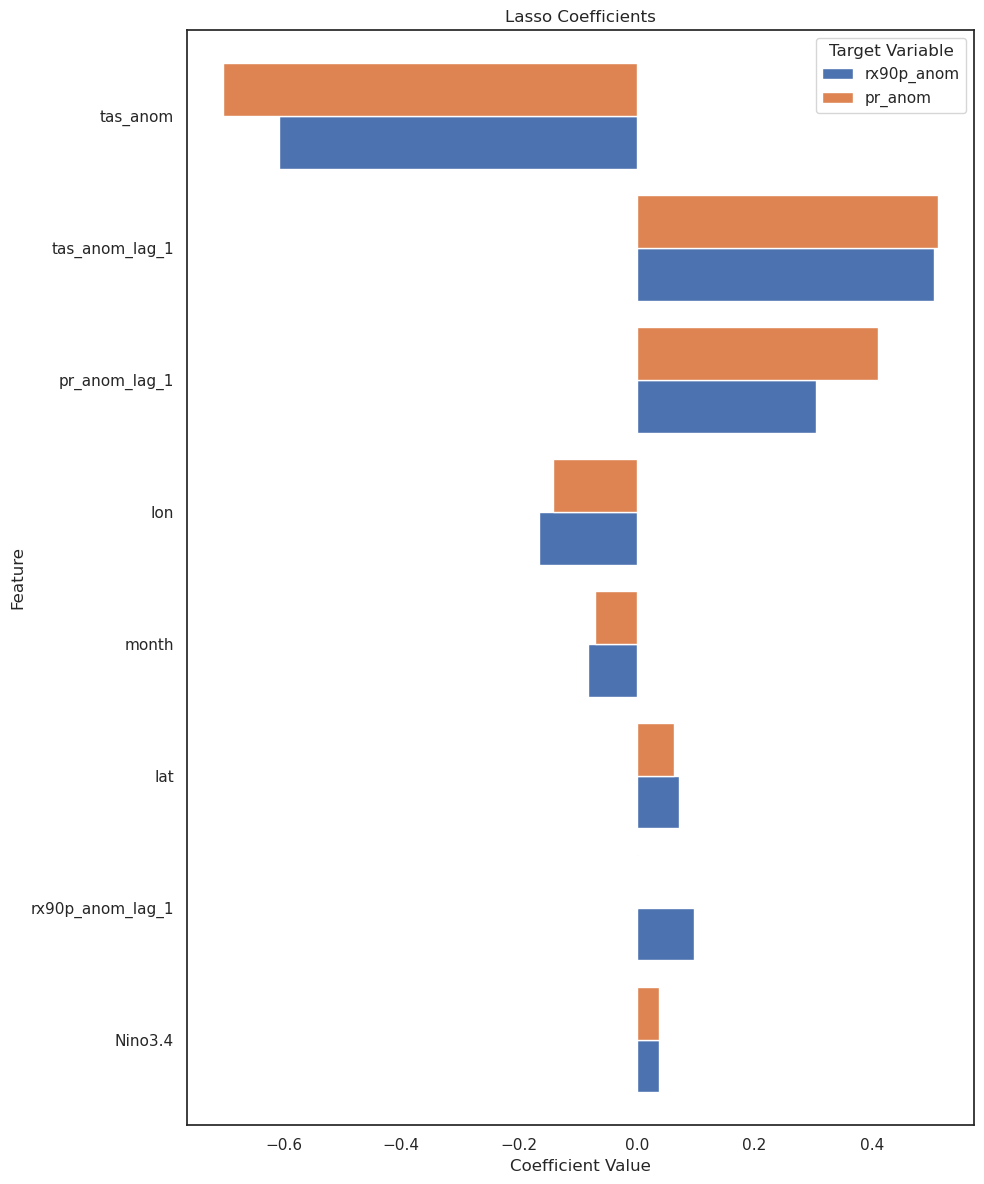

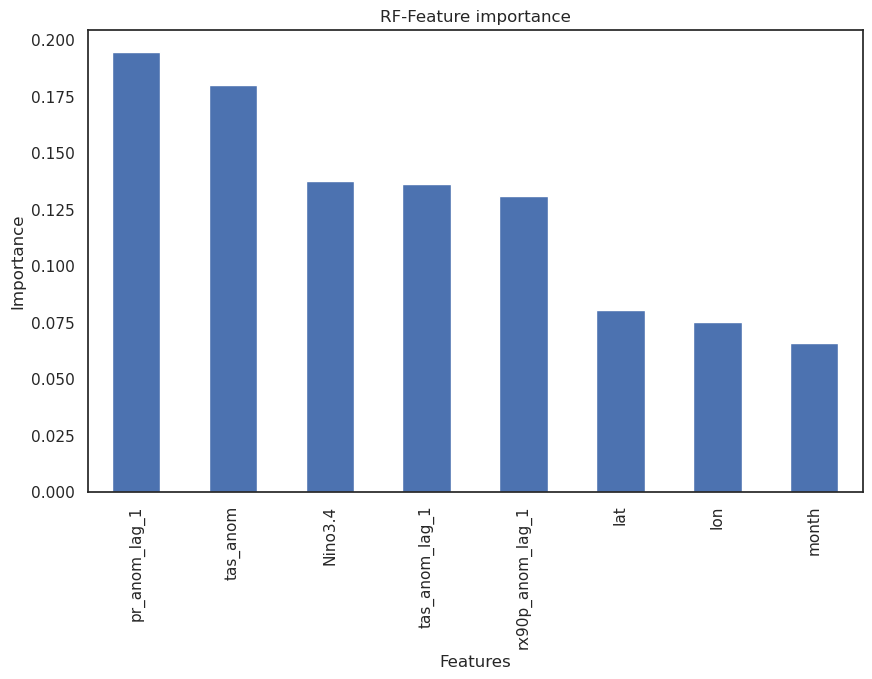

In [ ]:
experiment_name = "IdealTxx"

indicators_dict = calculate_indicators(indicators = ["rx90p", "pr", "tas"])
indicators_dict = indicators_calculate_extra_features(indicators_dict)
aggregated_indicators = aggregate_by_pixel(indicators_dict, 3, 75)
df = dict_to_dataframe(aggregated_indicators)
df_merged = df_add_index_variables(df, mean = False, trend=False, lags = 0)

df_scaled = encode_and_scale(df_merged)
X_train, y_train, X_val, y_val = train_test_split(df_scaled, include_years=False)

models = build_and_train_models(X_train, y_train, models = {"Lasso": MultiTaskLasso(random_state = 123),
                                                            "RF" : RandomForestRegressor(n_estimators=100, random_state=123)}, experiment_name = experiment_name)
evaluate_models(X_val, y_val, models, store_testing=True, out_path = "/home/vgarcia/experiments/FeatureSelection/", experiment_name=experiment_name)

lasso_plot(models[f"{experiment_name}_Lasso"], X_val.columns, out_path = f"/home/vgarcia/experiments/FeatureSelection/{experiment_name}")
RF_plot(models[f"{experiment_name}_RF"], X_val.columns, out_path = f"/home/vgarcia/experiments/FeatureSelection/{experiment_name}")

## Add lags to indicators

In [ ]:
## Add indicators
# test wether the firsts feature set is correlated
lags_list = [1, 3, 6, 9]

for lag in lags_list:
    experiment_name = f"Taslag{lag}"

    indicators_dict = calculate_indicators(indicators = ["rx90p", "pr", "txx"])
    indicators_dict = indicators_calculate_extra_features(indicators_dict, lags = lag)
    aggregated_indicators = aggregate_by_pixel(indicators_dict, 3, 75)
    df = dict_to_dataframe(aggregated_indicators)
    df_merged = df_add_index_variables(df, mean = False, trend=False, lags = 0)

    df_merged = df_merged.drop("txx_anom", axis = 1)
    df_scaled = encode_and_scale(df_merged)
    X_train, y_train, X_val, y_val = train_test_split(df_scaled, include_years=False)

    models = build_and_train_models(X_train, y_train, models = {"Lasso": MultiTaskLasso(random_state = 123),
                                                                "RF" : RandomForestRegressor(n_estimators=100, random_state=123)}, experiment_name = experiment_name)
    evaluate_models(X_val, y_val, models, store_testing=True, out_path = "/home/vgarcia/experiments/FeatureSelection/", experiment_name=experiment_name)

    lasso_plot(models[f"{experiment_name}_Lasso"], X_val.columns, out_path = f"/home/vgarcia/experiments/FeatureSelection/{experiment_name}")
    RF_plot(models[f"{experiment_name}_RF"], X_val.columns, out_path = f"/home/vgarcia/experiments/FeatureSelection/{experiment_name}")

### Add 3 month aggregation

In [ ]:
def seasonal_aggregation(df, indicators=["rx90p_anom", "pr_anom", "txx_anom"], aggregate_range=[1, 12]):
    start, end = aggregate_range

    for ind in indicators:
        for i in range(start, end + 1, 3):
            # Define 3-month window
            window = range(i, min(i + 3, end + 1))
            lag_cols = [f"{ind}_lag_{j}" for j in window]

            # Check if all lag columns exist
            if all(col in df.columns for col in lag_cols):
                # Create new column with mean of the 3 lags
                col_name = f"{ind}_agg_lag{window[0]}_{window[-1]}"
                df[col_name] = df[lag_cols].mean(axis=1)

                # Drop the original lag columns
                df = df.drop(columns=lag_cols, axis = 1)
            else:
                print(f"Warning: Missing lag columns for '{ind}' in range {window[0]}-{window[-1]}.")

    return df


---Training (MSE, MSSS, MAE, R2)---
Lasso: [0.25164162 0.20172579], [0.15963688 0.18530103], [0.32075927 0.31058886], [0.12839118 0.15484665]
RF: [0.02420331 0.01607049], [0.91917246 0.93509698], [0.08802485 0.07467463], [0.9161672  0.93267083]
All models trained
---Testing (MSE, MSSS, MAE, R2)---
Climatology: [0.30390796 0.21633211], [0. 0.], [0.36061679 0.32359138], [-0.09983644 -0.03920734]
Txx_3mo9_Lasso: [0.25257162 0.18904589], [0.16892068 0.12613117], [0.33865069 0.31371591], [0.08594868 0.09186909]
Txx_3mo9_RF: [0.26062577 0.20348619], [0.14241873 0.05938056], [0.34543772 0.32603836], [0.05680088 0.02250137]


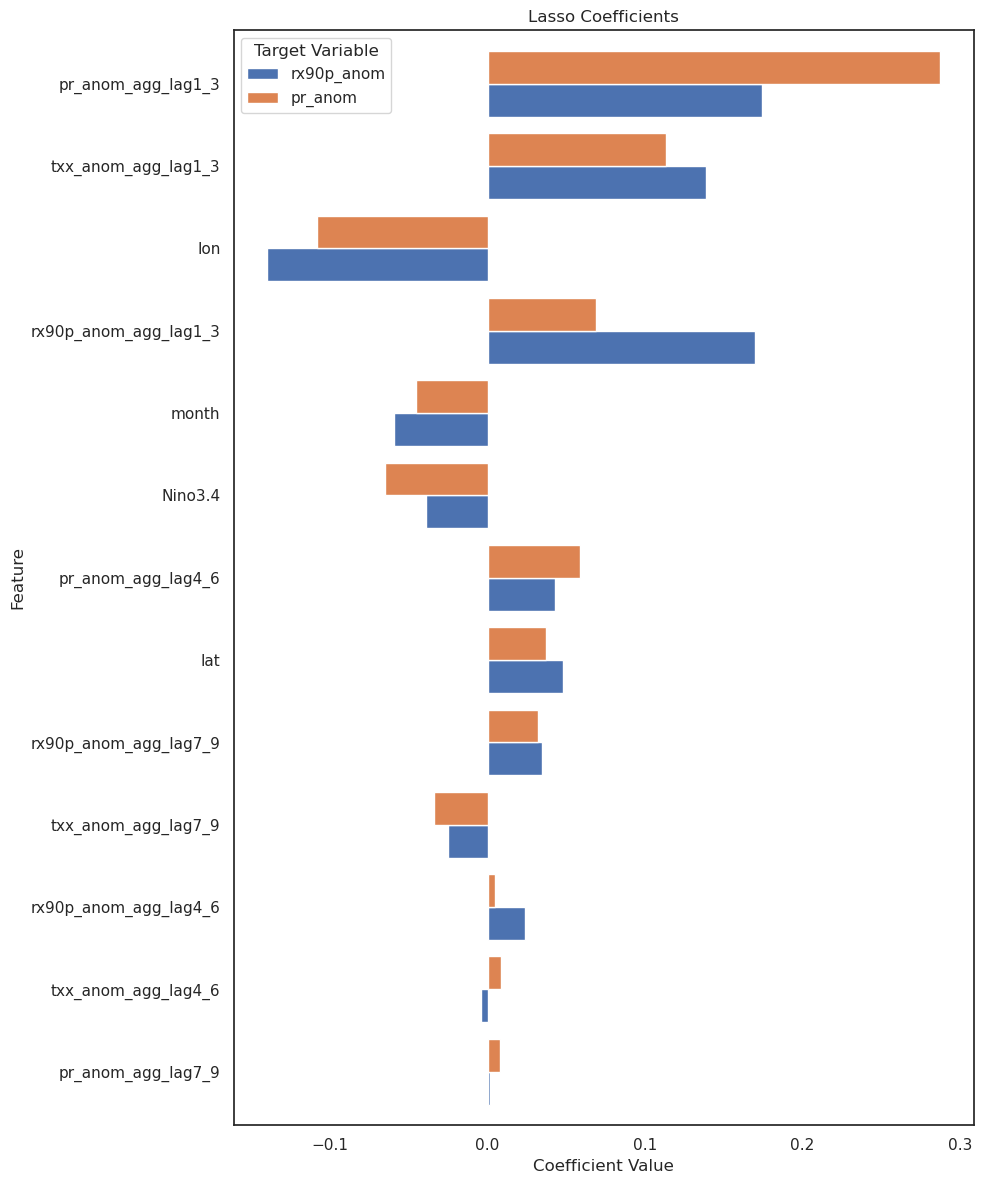

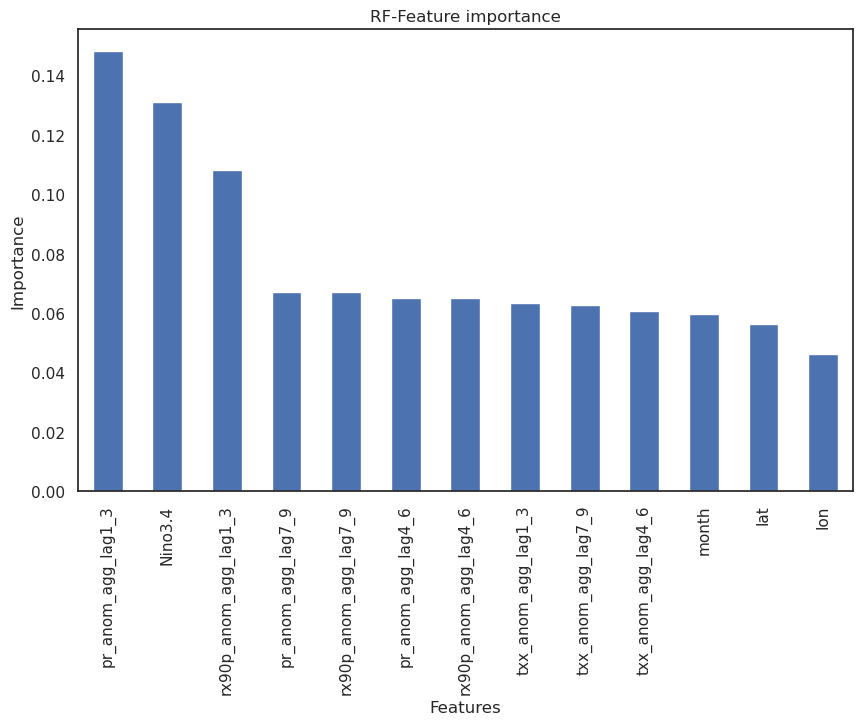

In [ ]:
experiment_name = f"Txx_3mo9"

indicators_dict = calculate_indicators(indicators = ["rx90p", "pr", "txx"])
indicators_dict = indicators_calculate_extra_features(indicators_dict, lags = 12)

aggregated_indicators = aggregate_by_pixel(indicators_dict, 3, 75)
df = dict_to_dataframe(aggregated_indicators)
df = df.drop("txx_anom", axis = 1)
df = seasonal_aggregation(df)

df_merged = df_add_index_variables(df, mean = False, trend=False, lags = 0)
df_scaled = encode_and_scale(df_merged)

df_scaled = pd.read_csv("df_scaled.csv", index_col= 0)
df_scaled = df_scaled.drop(["rx90p_anom_agg_lag10_12", "pr_anom_agg_lag10_12", "txx_anom_agg_lag10_12"], axis = 1)
X_train, y_train, X_val, y_val = train_test_split(df_scaled, include_years=False)

models = build_and_train_models(X_train, y_train, models = {"Lasso": MultiTaskLasso(random_state = 123),
                                                            "RF" : RandomForestRegressor(n_estimators=100, random_state=123)}, experiment_name = experiment_name, season_aggr=True)
evaluate_models(X_val, y_val, models, store_testing=True, out_path = "/home/vgarcia/experiments/FeatureSelection/", experiment_name=experiment_name)

lasso_plot(models[f"{experiment_name}_Lasso"], X_val.columns, out_path = f"/home/vgarcia/experiments/FeatureSelection/{experiment_name}")
RF_plot(models[f"{experiment_name}_RF"], X_val.columns, out_path = f"/home/vgarcia/experiments/FeatureSelection/{experiment_name}")

# 4) Hyperparameter optimization

In [8]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import Lasso
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

## Default HGBD

In [104]:
experiment_name = "baseline"

indicators_dict = calculate_indicators(indicators = ["rx90p", "pr", "txx"])
indicators_dict = indicators_calculate_extra_features(indicators_dict, lags = 3)

aggregated_indicators = aggregate_by_pixel(indicators_dict, 3, 75)
df = dict_to_dataframe(aggregated_indicators)
df_merged = df_add_index_variables(df, mean = False, trend=False, lags = 0)
df_scaled = encode_and_scale(df_merged)

df_scaled = df_scaled.drop(["txx_anom"], axis = 1)

X_train, y_train, X_val, y_val = train_test_split(df_scaled, include_years=False)

calculating montly mean for pr


In [126]:
# Define model with fixed parameters
models_dict = {"HGBR" : HistGradientBoostingRegressor(
    random_state=123),
    "Lasso" : Lasso(random_state=123)}

models_dict = build_and_train_models(X_train, y_train, models_dict, store_models=True, out_path="/home/vgarcia/experiments/Optimization/", experiment_name=experiment_name,multi_output_wrapper=True)
evaluate_models(X_val, y_val, models_dict, store_testing=True, out_path="/home/vgarcia/experiments/Optimization/", experiment_name=experiment_name)

---Training (MSE, MSSS, MAE, R2)---
HGBR: [0.19743312 0.14948677], [0.33685046 0.39199921], [0.28967273 0.26670385], [0.32247192 0.38052566]
Lasso: [0.29140212 0.24131228], [0.02122205 0.01852143], [0.33794086 0.33414156], [0. 0.]
All models trained
---Testing (MSE, MSSS, MAE, R2)---
Climatology: [0.30320912 0.21778345], [0. 0.], [0.35812596 0.3248619 ], [-0.09477359 -0.05020249]
baseline_HGBR: [0.25164934 0.18957011], [0.17004696 0.12954767], [0.33626444 0.31277233], [0.09138933 0.0858488 ]
baseline_Lasso: [0.28368004 0.2074607 ], [0.06440797 0.04739913], [0.3477894  0.31986052], [-0.02426145 -0.0004238 ]


## Optimize

In [ ]:
def optimize_and_train_model(X_train, y_train, models_dict, search_space_dict,
                                                    experiment_name = "",
                                                    store_models = False,
                                                    store_training = False,
                                                    out_path = None,
                                                    time_aggr = "month",
                                                    target_lag_prefix = "_lag_1"):
    """
    All models will use wrappers
    """
    
    # Store results
    results = []
    trained_models = {}

    # Use climatology model
    clim_model = ClimatologyModel(time_group=time_aggr)
    clim_model.fit(X_train, y_train, target_lag_prefix = target_lag_prefix)

    if store_models:
        joblib.dump(clim_model, f'{out_path}Climatology_model.pkl')

    y_pred = clim_model.predict(X_train)
    mse_clim = mean_squared_error(y_train, y_pred, multioutput="raw_values")
    trained_models["Climatology"] = clim_model

    # Use the other models
    if len(experiment_name) != 0:
        experiment_name = experiment_name + "_"

    for model_name, model in models_dict.items():
        print(f"---Optimizing {model_name}---")
        wrapped_model = MultiOutputRegressor(model)

        opt_model = BayesSearchCV(
            estimator=wrapped_model,
            search_spaces=search_space_dict[model_name],
            n_iter=30,  # Number of iterations for Bayesian optimization
            cv=20,
            n_jobs=-1,
            scoring='neg_mean_squared_error',
            random_state=123,
            verbose=1
        )

        # train the model with the optimal hyperparameters
        opt_model.fit(X_train, y_train)

        # store the model
        if store_models:
            joblib.dump(opt_model, f'{out_path}{model_name}_model.pkl')

        y_pred = opt_model.predict(X_train)

        mse = mean_squared_error(y_train, y_pred, multioutput="raw_values")
        msss = 1 - (mse / mse_clim)
        mae = mean_absolute_error(y_train, y_pred, multioutput="raw_values")
        r2 = r2_score(y_train, y_pred, multioutput="raw_values")

        print("(MSE, MSSS, MAE, R2)")
        print(f'{model_name}: {mse}, {msss}, {mae}, {r2}')

        result = {
            "Model": experiment_name + model_name
        }

        # Loop through each target and add its metrics to the same dictionary
        for i, target in enumerate(y_train.columns):
            result[f"MSE_{target[i]}"] = mse[i]
            result[f"MSSS_{target[i]}"] = msss[i]
            result[f"MAE_{target[i]}"] = mae[i]
            result[f"R2_{target[i]}"] = r2[i]

        # Append the final dictionary to results
        results.append(result)
        trained_models[experiment_name + model_name] = opt_model

        # Create DataFrame
        if store_training:
            results_df = pd.DataFrame(results)
            # Save to CSV
            results_df.to_csv(out_path + f"{experiment_name}training.csv", index = False)

    print("All models optimized")

    return trained_models

In [9]:
experiment_name = "Opt2"

indicators_dict = calculate_indicators(indicators = ["rx90p", "pr", "txx"])
indicators_dict = indicators_calculate_extra_features(indicators_dict, lags = 3)

aggregated_indicators = aggregate_by_pixel(indicators_dict, 3, 75)
df = dict_to_dataframe(aggregated_indicators)
df_merged = df_add_index_variables(df, mean = False, trend=False, lags = 0)
df_scaled = encode_and_scale(df_merged)

df_scaled = df_scaled.drop(["txx_anom"], axis = 1)

X_train, y_train, X_val, y_val = train_test_split(df_scaled, include_years=False)


# Define model with fixed parameters
models_dict = {"HGBR" : HistGradientBoostingRegressor(
    random_state=123,
    warm_start=True,
    validation_fraction=0.3,
    verbose=1), "Lasso" : Lasso(random_state = 123)}

# Define search space
search_spaces = {
    "HGBR": {
        'estimator__loss': Categorical(['squared_error', 'absolute_error']),
        'estimator__min_samples_leaf': Integer(1, 50),
        'estimator__max_features': Real(0.3, 1.0, prior='uniform'),
        "estimator__max_leaf_nodes" : Categorical([31, None])
    },
    "Lasso" : {
        'estimator__alpha': Real(1e-5, 10.0, prior="log-uniform"),
        "estimator__tol" : Real(1e-5, 1e-2, prior="log-uniform"),
        "estimator__max_iter": Integer(500, 5000, prior="uniform")
}}

models_dict = optimize_and_train_model(X_train, y_train, models_dict, search_spaces, store_models=True, out_path="/home/vgarcia/experiments/Optimization/", experiment_name=experiment_name)
evaluate_models(X_val, y_val, models_dict, store_testing=True, out_path="/home/vgarcia/experiments/Optimization/", experiment_name=experiment_name)

---Optimizing HGBR---
Fitting 20 folds for each of 1 candidates, totalling 20 fits
Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: 0.296 s
Binning 0.007 GB of validation data: 0.314 s
Binning 0.007 GB of validation data: 0.303 s
Binning 0.007 GB of validation data: 0.051 s
Fitting gradient boosted rounds:
0.312 s
Binning 0.007 GB of validation da

/home/vgarcia/miniconda3/envs/myenv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Binning 0.016 GB of training data: 0.199 s
Binning 0.007 GB of validation data: 0.050 s
Fitting gradient boosted rounds:
Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: Binning 0.016 GB of training data: 0.306 s
Binning 0.007 GB of validation data: 0.280 s
Binning 0.007 GB of validation data: 0.311 s
Binning 0.007 GB of validation data: 0.309 s
Binning 0.007 GB of validation data: 0.306 s
Binning 0.007 GB of valida

In [ ]:
models_dict = {"HGBR_opt" : joblib.load("/home/vgarcia/experiments/Optimization/HGBR_opt_model.pkl"),
               "Lasso_opt" : joblib.load("/home/vgarcia/experiments/Optimization/Lasso_opt_model.pkl"),
               "Climatology" : joblib.load("/home/vgarcia/experiments/Optimization/Climatology_model.pkl")}

evaluate_models(X_val, y_val, models_dict, store_testing=True, out_path="/home/vgarcia/experiments/Optimization/", experiment_name=experiment_name)

# Inspect the best models

In [ ]:
# Get best models
multi_output_model = models_dict["HGBR_opt"].best_estimator_

# Loop through individual regressors for each target
for i, est in enumerate(multi_output_model.estimators_):
    print(f"Best parameters for target {i}:")
    print(est.get_params())

Best parameters for target 0:
{'categorical_features': 'from_dtype', 'early_stopping': 'auto', 'interaction_cst': None, 'l2_regularization': 0.0, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_bins': 255, 'max_depth': None, 'max_features': 0.3, 'max_iter': 100, 'max_leaf_nodes': 31, 'min_samples_leaf': 50, 'monotonic_cst': None, 'n_iter_no_change': 10, 'quantile': None, 'random_state': 123, 'scoring': 'loss', 'tol': 1e-07, 'validation_fraction': 0.3, 'verbose': 1, 'warm_start': True}
Best parameters for target 1:
{'categorical_features': 'from_dtype', 'early_stopping': 'auto', 'interaction_cst': None, 'l2_regularization': 0.0, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_bins': 255, 'max_depth': None, 'max_features': 0.3, 'max_iter': 100, 'max_leaf_nodes': 31, 'min_samples_leaf': 50, 'monotonic_cst': None, 'n_iter_no_change': 10, 'quantile': None, 'random_state': 123, 'scoring': 'loss', 'tol': 1e-07, 'validation_fraction': 0.3, 'verbose': 1, 'warm_start': True}


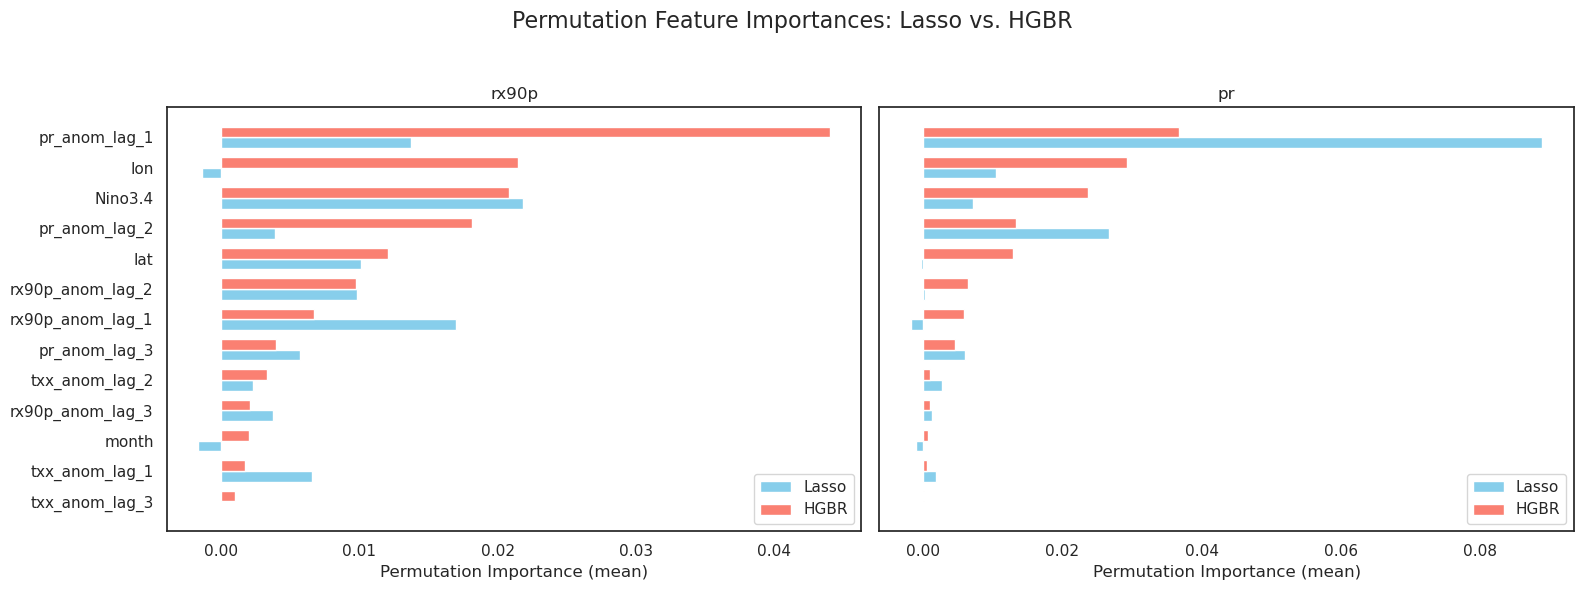

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define models and labels
model_keys = ["Lasso_opt", "HGBR_opt"]
target = ["rx90p", "pr"]
model_labels = ["Lasso", "HGBR"]
colors = ["skyblue", "salmon"]

# Store importances: dict[target][model] = importances
importances = {0: {}, 1: {}}
feature_names = X_val.columns

# Compute permutation importances
for model_key, model_label in zip(model_keys, model_labels):
    multi_model = models_dict[model_key].best_estimator_
    for i in range(y_val.shape[1]):  # for each target
        est = multi_model.estimators_[i]
        result = permutation_importance(
            est, X_val, y_val.iloc[:, i],
            n_repeats=10, random_state=123, n_jobs=-1
        )
        importances[i][model_label] = result.importances_mean

# Create figure with two subplots (one per target)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for i in range(y_val.shape[1]):  # for each target
    df_imp = pd.DataFrame({
        model_labels[0]: importances[i][model_labels[0]],
        model_labels[1]: importances[i][model_labels[1]],
    }, index=feature_names)

    df_imp = df_imp.sort_values(by=model_labels[1], ascending=True)
    y_pos = np.arange(len(df_imp))
    bar_height = 0.35

    axes[i].barh(y_pos - bar_height/2, df_imp[model_labels[0]], height=bar_height, label=model_labels[0], color=colors[0])
    axes[i].barh(y_pos + bar_height/2, df_imp[model_labels[1]], height=bar_height, label=model_labels[1], color=colors[1])
    
    axes[i].set_title(target[i])
    axes[i].set_xlabel("Permutation Importance (mean)")
    axes[i].set_yticks(y_pos)
    axes[i].set_yticklabels(df_imp.index)
    axes[i].invert_yaxis()
    axes[i].legend()

plt.suptitle("Permutation Feature Importances: Lasso vs. HGBR", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig()
plt.show()


# Make plots

## Ideal models

In [8]:
df_sorted, baseline_df = load_experiment_results("/home/vgarcia/experiments/ExtraLags", baseline_name="baseline", models=["Lasso", "RF"])

In [9]:
baseline_df = pd.DataFrame.from_dict(baseline_df, orient='index')
baseline_df.columns = [col + '_Diff' if col != 'Model' else col for col in baseline_df.columns]
df_sorted = df_sorted[["Model", "MSE_rx90p_anom_Diff", "MSE_pr_anom_Diff", "R2_rx90p_anom_Diff", "R2_pr_anom_Diff"]]
baseline_df = baseline_df[["Model", "MSE_rx90p_anom_Diff", "MSE_pr_anom_Diff", "R2_rx90p_anom_Diff", "R2_pr_anom_Diff"]]
full_df = pd.concat([df_sorted, baseline_df], ignore_index=True)
full_df.to_latex()

'\\begin{tabular}{llrrrr}\n\\toprule\n & Model & MSE_rx90p_anom_Diff & MSE_pr_anom_Diff & R2_rx90p_anom_Diff & R2_pr_anom_Diff \\\\\n\\midrule\n0 & Txxlag9_RF & -0.043372 & -0.032168 & 0.156105 & 0.161582 \\\\\n1 & Txxlag6_RF & -0.041669 & -0.031191 & 0.153016 & 0.154825 \\\\\n2 & Txxlag3_RF & -0.033405 & -0.024923 & 0.121523 & 0.122030 \\\\\n3 & Txx_3mo9_RF & -0.029929 & -0.019122 & 0.106793 & 0.097811 \\\\\n4 & Txxlag9_Lasso & -0.017825 & -0.006674 & 0.063773 & 0.038367 \\\\\n5 & Txx_3mo9_Lasso & -0.017904 & -0.006003 & 0.063380 & 0.034054 \\\\\n6 & Txxlag6_Lasso & -0.016519 & -0.006338 & 0.062178 & 0.034711 \\\\\n7 & Txxlag3_Lasso & -0.013971 & -0.005003 & 0.051290 & 0.025742 \\\\\n8 & Txxlag1_RF & -0.006444 & -0.006242 & 0.023286 & 0.030152 \\\\\n9 & Txxlag1_Lasso & -0.004375 & 0.000453 & 0.015808 & -0.002190 \\\\\n10 & baseline_Lasso & 0.270476 & 0.195049 & 0.022568 & 0.057815 \\\\\n11 & baseline_RF & 0.290555 & 0.222608 & -0.049992 & -0.075310 \\\\\n\\bottomrule\n\\end{tabular}\n

In [ ]:
# Add a new column
feature_used = {"AllIndicators" : "hurs ssr g500\n\ntas txx tas tnn",
                "IdealFullSet" : "hurs ssr",
                "IdealTempSet" : "txx tas tnn",
                "IdealTxx" : "txx"}

df_sorted["extra_features"] = df_sorted["Model"].apply(
    lambda x: feature_used.get(x.split("_")[0], "")
)
df_sorted.insert(1, "extra_features", df_sorted.pop("extra_features"))

baseline_df["extra_features"] = baseline_df["Model"].apply(
    lambda x: feature_used.get(x.split("_")[0], "")
)
baseline_df.insert(1, "extra_features", baseline_df.pop("extra_features"))

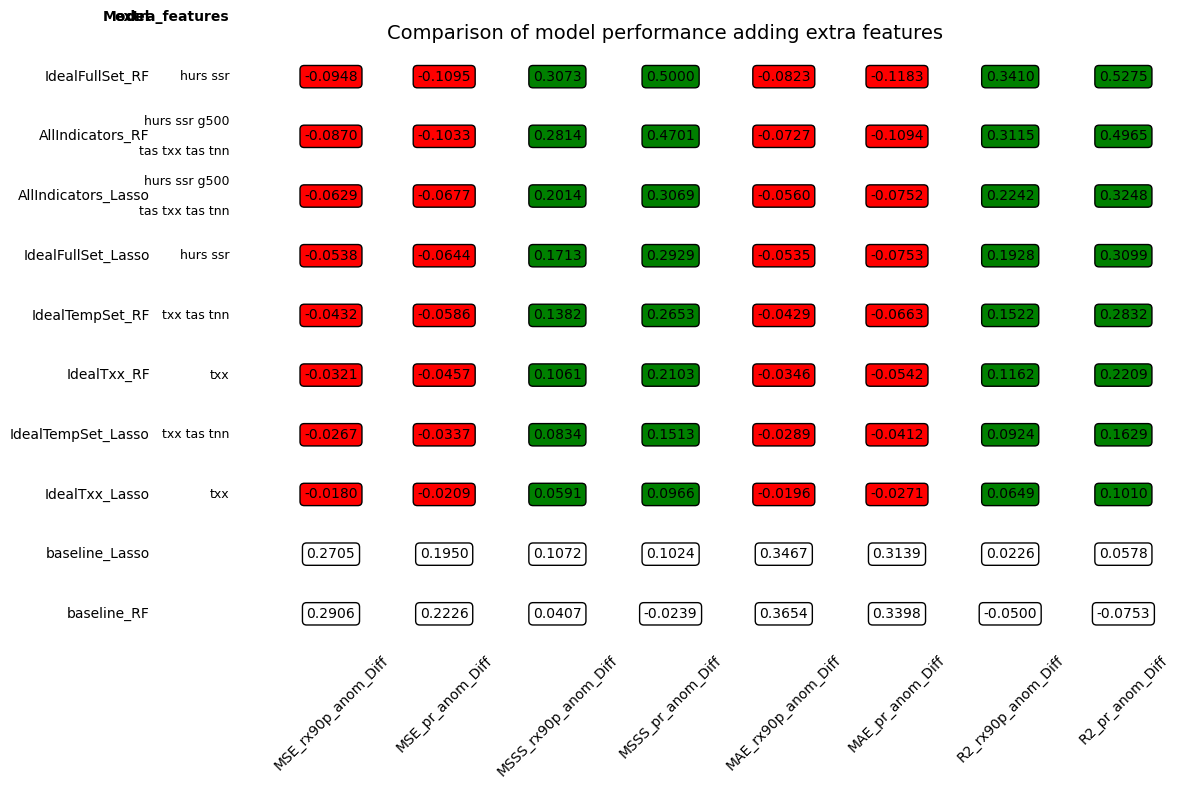

In [55]:
plot_experiments_difference(df_sorted, title = "Comparison of model performance adding extra features", out_path="/home/vgarcia/experiments/plots/test.png", baseline_df=baseline_df, extra_col="extra_features")

## Txx effect

In [3]:
def load_experiment_results(experiment_path, baseline_name=None, models=["Lasso", "RF"]):
    """
    Loads and processes model experiment results.
    
    If a baseline is provided, computes differences in performance metrics relative to the baseline.
    
    Parameters:
        experiment_path (str): Path to folder with CSVs.
        baseline_name (str, optional): Name prefix of the baseline models.
        models (list of str): List of model suffixes (e.g., ['Lasso', 'RF']).
    
    Returns:
        pd.DataFrame: Sorted DataFrame of (optionally diffed) results.
    """
    df = merge_csv_folder(experiment_path)

    # If no baseline is given, sort directly on performance metrics
    if not baseline_name:
        return df.sort_values(by=["R2_pr_anom", "R2_rx90p_anom"], ascending=False)

    # Separate baseline rows
    baseline_rows = {
        model: df[df["Model"] == f"{baseline_name}_{model}"].squeeze()
        for model in models
    }

    # Remove baseline rows from main DataFrame
    comparison_df = df[~df["Model"].isin([f"{baseline_name}_{model}" for model in models])]

    # Store updated rows here
    result_rows = []

    for model in models:
        # Extract rows for this model type (e.g., all "_RF")
        model_df = comparison_df[comparison_df["Model"].str.endswith(f"_{model}")].copy()

        # Compute metric differences
        for col in df.columns:
            if col != "Model":
                model_df[f"{col}_Diff"] = model_df[col] - baseline_rows[model][col]

        result_rows.append(model_df[["Model"] + [c for c in model_df.columns if c.endswith("_Diff")]])

    # Combine result rows
    result_df = pd.concat(result_rows, ignore_index=True)

    # Sort by main diff columns if they exist
    sort_cols = [col for col in result_df.columns if col in ["R2_pr_anom_Diff", "R2_rx90p_anom_Diff"]]

    # transform baseline
    df_baseline = pd.DataFrame.from_dict(baseline_rows, orient='index')

    # Rename all columns by appending "_Diff"
    df_baseline.columns = [col if col == 'Model' else f"{col}_Diff" for col in df_baseline.columns]

    return result_df.sort_values(by=sort_cols, ascending=False) if sort_cols else result_df, df_baseline

In [8]:
df_sorted, baseline_df = load_experiment_results("/home/vgarcia/experiments/ExtraLags", baseline_name="baseline", models=["Lasso", "RF"])

In [11]:
df_sorted= load_experiment_results("/home/vgarcia/experiments/annual_ML")

In [19]:
# Save en latex format
latex_table = df_sorted.to_latex(index=False, float_format="%.5f", longtable=True)

# Save to a file (optional)
with open("training_model_metrics_table.tex", "w") as f:
    f.write(latex_table)

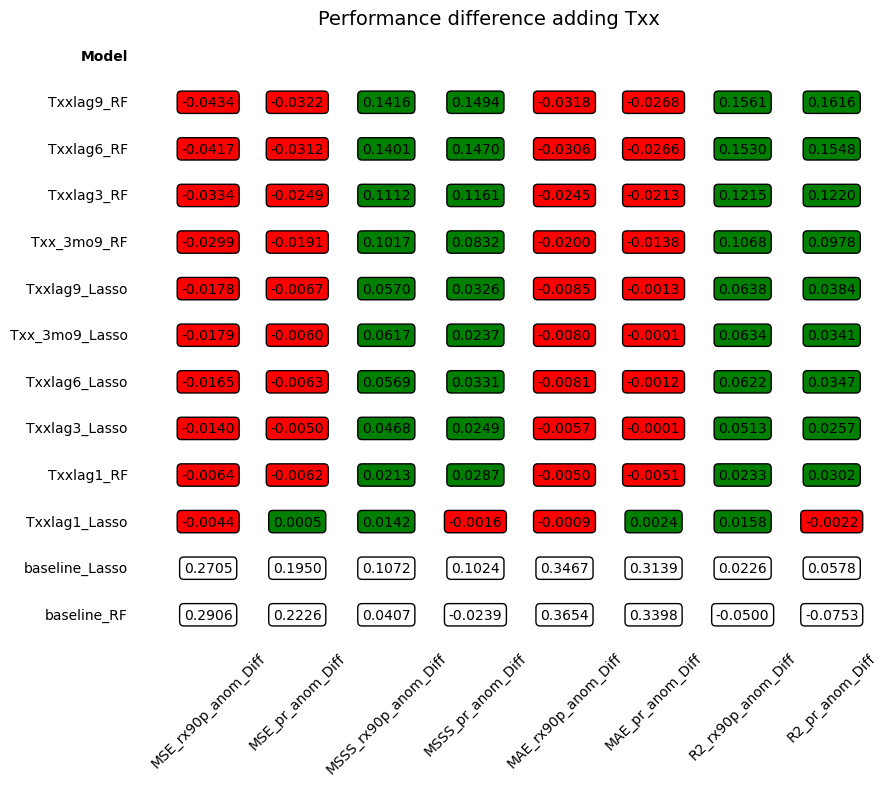

In [42]:
plot_experiments_difference(df_sorted, "Performance difference adding Txx", out_path="/home/vgarcia/experiments/plots/txx_diff.png", baseline_df=baseline_df)